## **Importing Required Libraries**

In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings 
warnings.filterwarnings("ignore")
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE,RandomOverSampler
from collections import Counter

In [135]:
df = pd.read_csv(r"E:\Internship Projects DH C\Personal Loan Acceptance Classifier\bank+marketing\bank\bank-full.csv",sep = ";")

In [136]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [137]:
df.sample(5)

age            job   marital  education default  balance housing loan  \
30169   51     technician  divorced    primary      no      300      no  yes   
18721   35     management    single  secondary      no     2383     yes   no   
36739   44       services    single  secondary      no      492     yes   no   
22668   37  self-employed   married  secondary      no      119      no   no   
1457    45       services   married  secondary      no       22     yes   no   

        contact  day month  duration  campaign  pdays  previous poutcome   y  
30169  cellular    5   feb         8         6     -1         0  unknown  no  
18721  cellular   31   jul        67         6     -1         0  unknown  no  
36739  cellular   12   may        56         1    361         2    other  no  
22668  cellular   25   aug        68         4     -1         0  unknown  no  
1457    unknown    8   may       209         3     -1         0  unknown  no

In [138]:
df.shape

(45211, 17)

In [139]:
# checking null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [140]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

## **The Data Set is Clearly Imbalanced**

In [141]:
df["y"].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

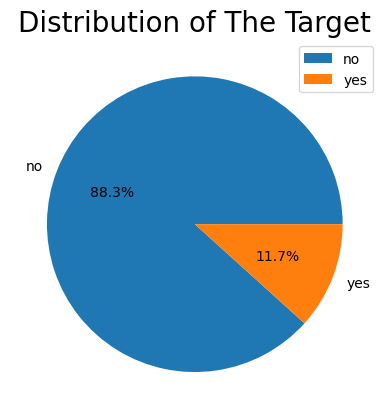

In [142]:
plt.pie(df["y"].value_counts(),labels = df["y"].value_counts().index,autopct = "%1.1f%%")
plt.title("Distribution of The Target",fontsize = 20)
plt.legend()
plt.show()

## **Most of the target People Fall in age from 30 to 56**

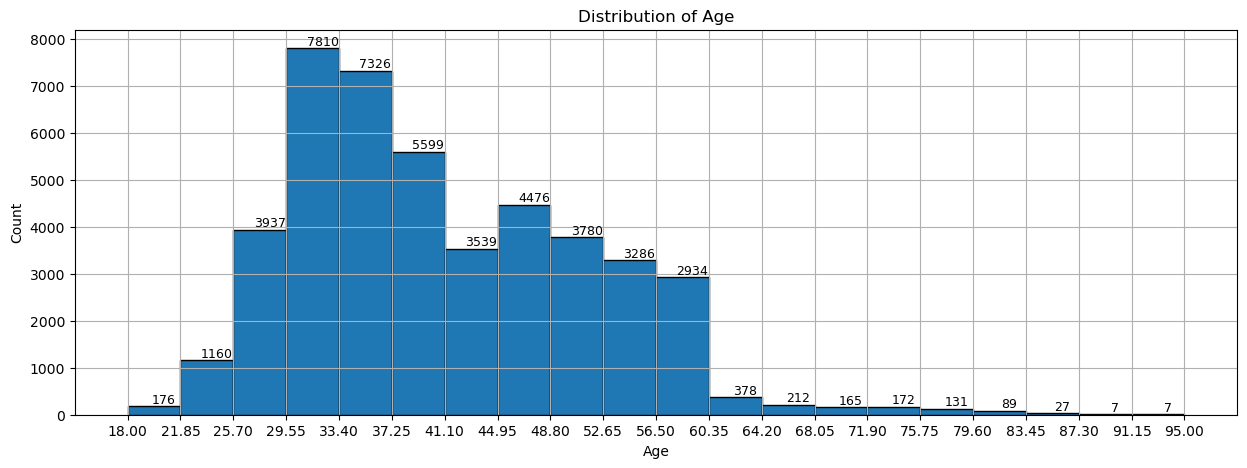

In [143]:
plt.figure(figsize = (15,5))
counts, bin_edges, _ = plt.hist(df["age"], bins=20, edgecolor='black')
for count, x in zip(counts, bin_edges):
    plt.text(x + 2.65, count, str(int(count)), ha='center', va='bottom', fontsize=9)
plt.xticks(bin_edges)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")
plt.grid(True)
plt.show()

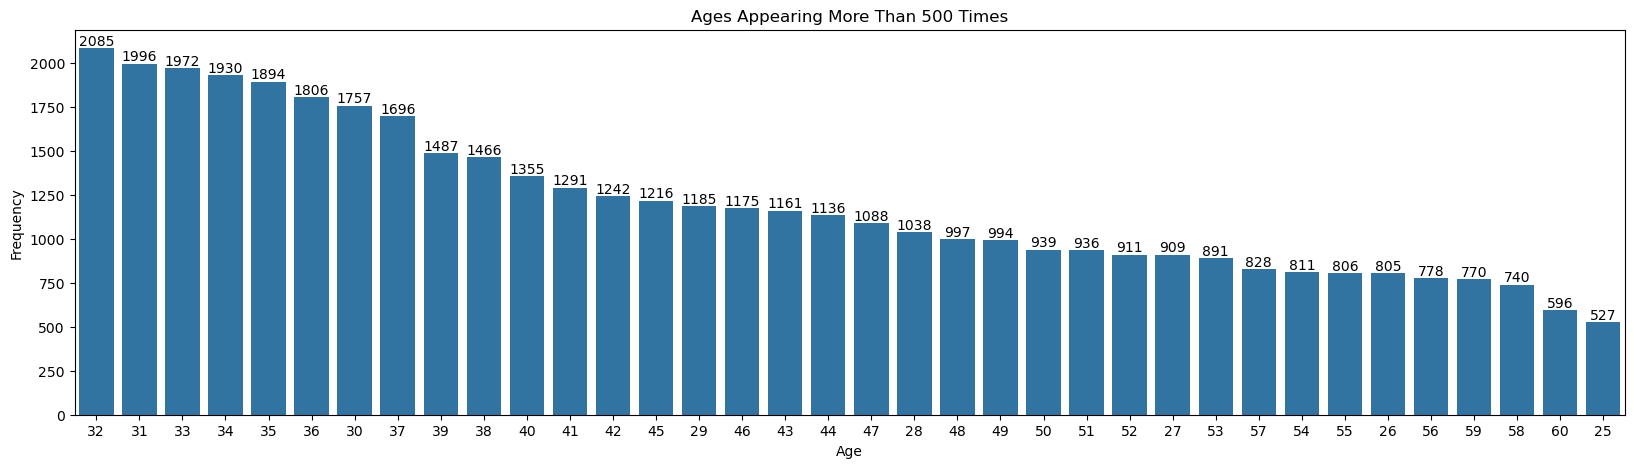

In [144]:
age_counts = df["age"].value_counts()
age_filtered = age_counts[age_counts > 500]

age_df = age_filtered.reset_index()
age_df.columns = ['age', 'count']
age_df = age_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(20, 5))
ax = sns.barplot(x='age', y='count', data=age_df, order=age_df['age'])
for i in ax.containers:
    ax.bar_label(i)
plt.title("Ages Appearing More Than 500 Times")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## **The graph is positively Skewed (right skewed) means tail is in right side**

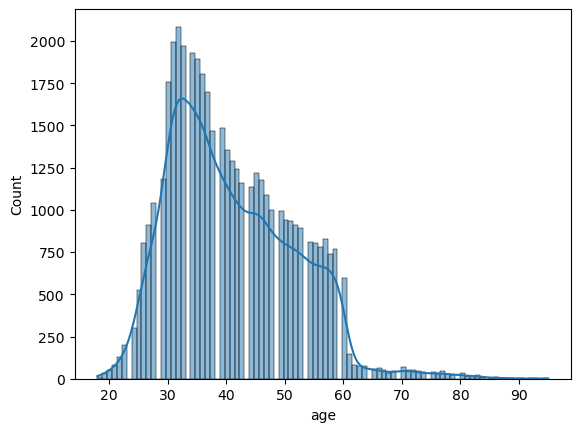

In [145]:
sns.histplot(x = df["age"],kde = True)
plt.show()

## **The age box plot show overlap in Distribution of Target seem less important as their is very small difference in Age Median and more overlap in Boxplots**

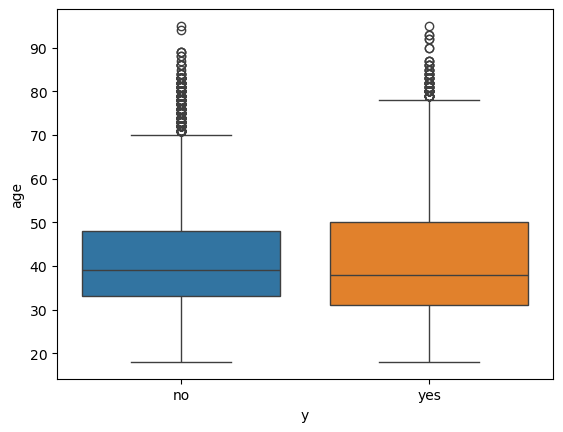

In [146]:
sns.boxplot(y = df["age"],hue = df["y"],x = df["y"])
plt.show()

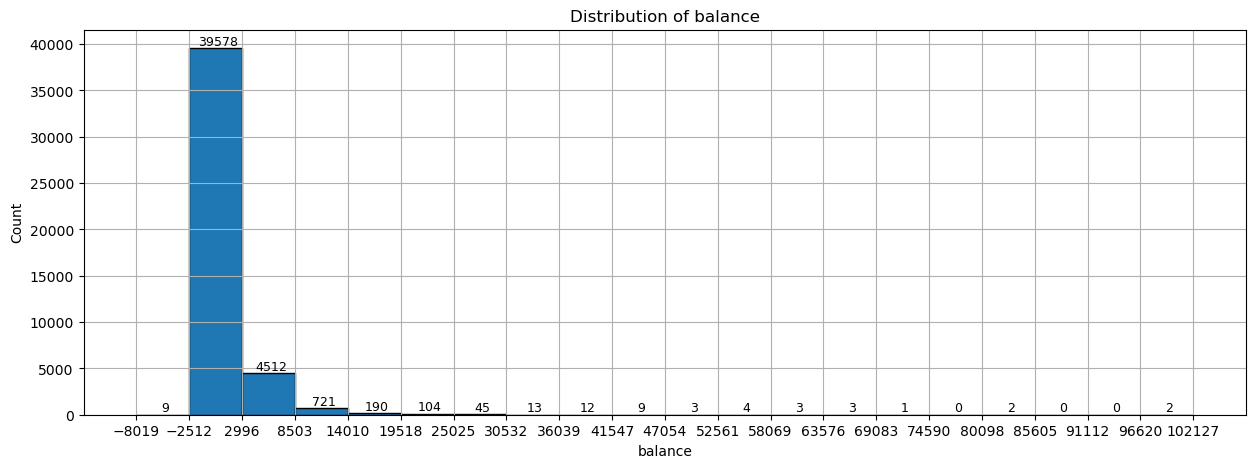

In [147]:
plt.figure(figsize = (15,5))
counts, bin_edges, _ = plt.hist(df["balance"], bins=20, edgecolor='black')
for count, x in zip(counts, bin_edges):
    plt.text(x + 3000, count, str(int(count)), ha='center', va='bottom', fontsize=9)
plt.xticks(bin_edges)
plt.xlabel("balance")
plt.ylabel("Count")
plt.title("Distribution of balance")
plt.grid(True)
plt.show()

## **There are many outliers in balance feature**

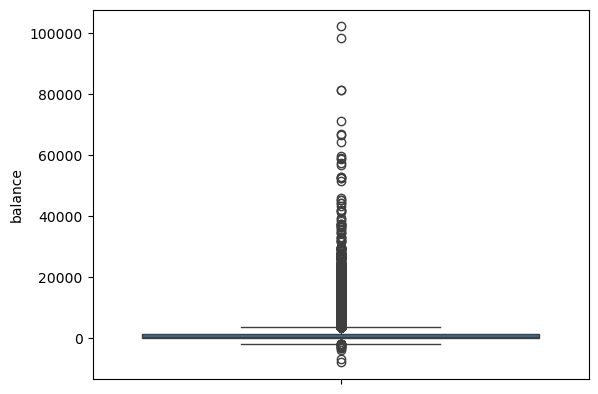

In [148]:
sns.boxplot(y = df["balance"])
plt.show()

In [149]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

## **Removig upper and lower extremes in balanace feature**

In [150]:
q_low = df['balance'].quantile(0.01)
q_high = df['balance'].quantile(0.99)

df = df[(df['balance'] >= q_low) & (df['balance'] <= q_high)]

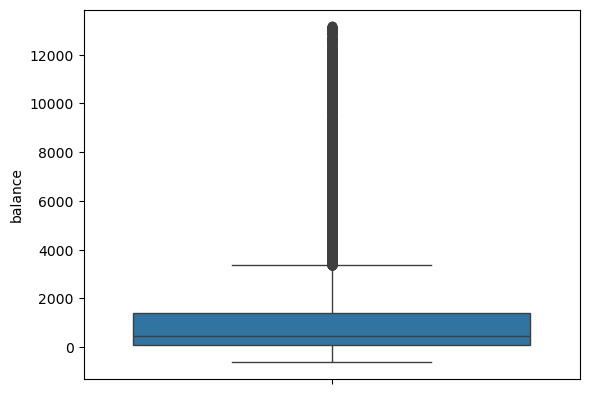

In [151]:
sns.boxplot(y = df["balance"])
plt.show()

In [152]:
df.shape

(44308, 17)

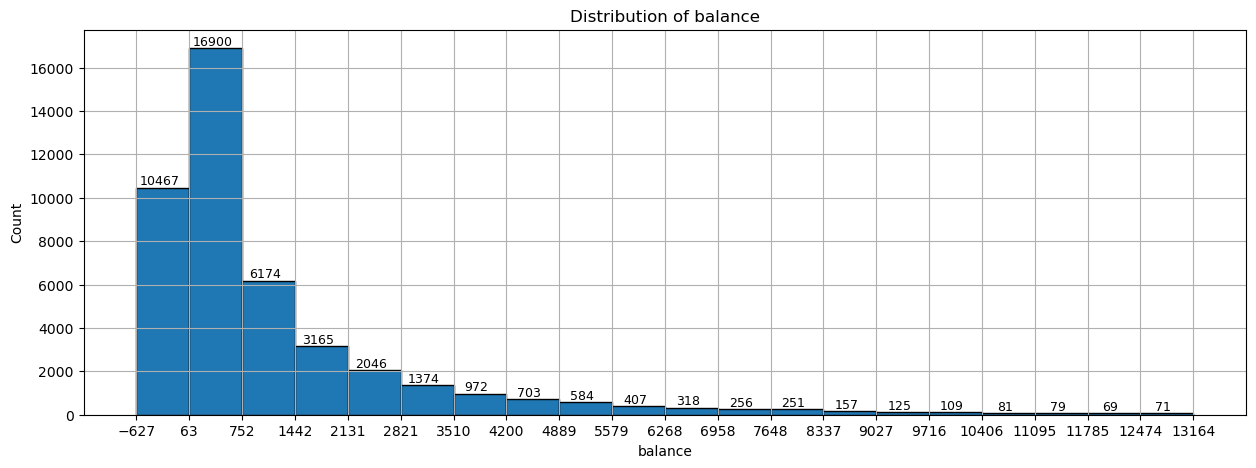

In [153]:
plt.figure(figsize = (15,5))
counts, bin_edges, _ = plt.hist(df["balance"], bins=20, edgecolor='black')
for count, x in zip(counts, bin_edges):
    plt.text(x + 300, count, str(int(count)), ha='center', va='bottom', fontsize=9)
plt.xticks(bin_edges)
plt.xlabel("balance")
plt.ylabel("Count")
plt.title("Distribution of balance")
plt.grid(True)
plt.show()

## **The balance box plot show overlap in Distribution of Target seem less important**

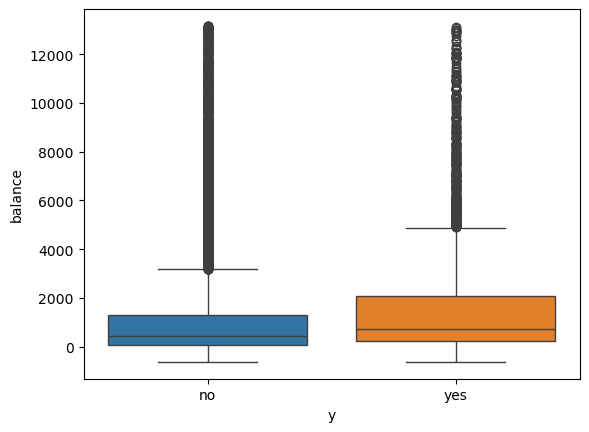

In [154]:
sns.boxplot(y = df["balance"],hue = df["y"],x = df["y"])
plt.show()

## **The campaign box plot show overlap in Distribution of Target alone it seem less important but we will test in model by including it and not including it**

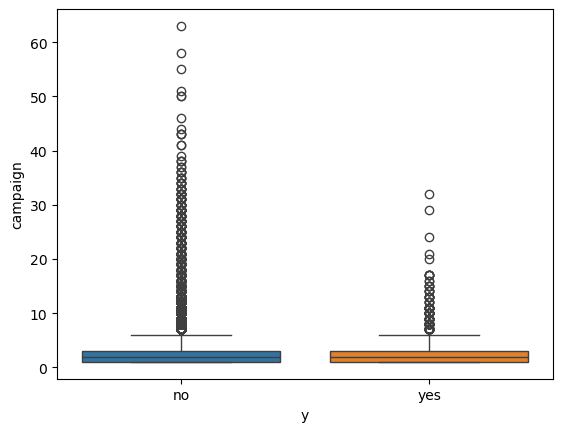

In [155]:
sns.boxplot(y = df["campaign"],hue = df["y"],x = df["y"])
plt.show()

## **Most of People are Married**

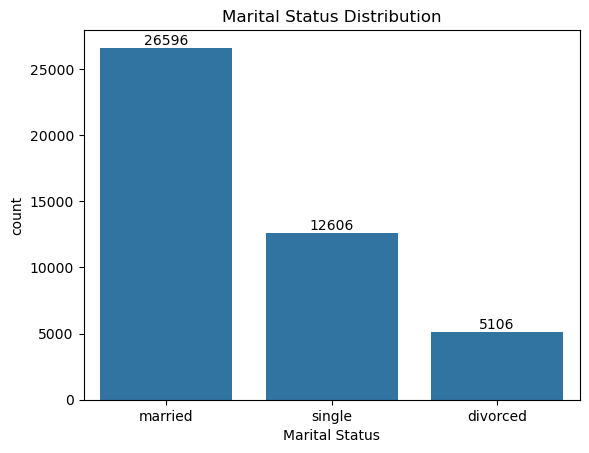

In [156]:
ax = sns.countplot(x = df["marital"])
for i in ax.containers:
    ax.bar_label(i)
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.show()

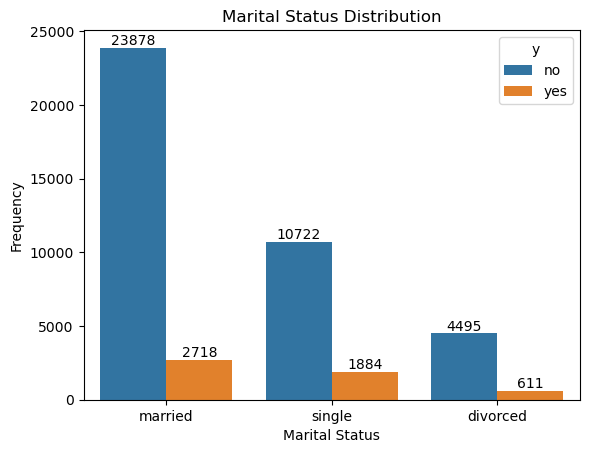

In [157]:
ax = sns.countplot(x = df["marital"],hue = df["y"])
for i in ax.containers:
    ax.bar_label(i)
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Frequency")
plt.show()

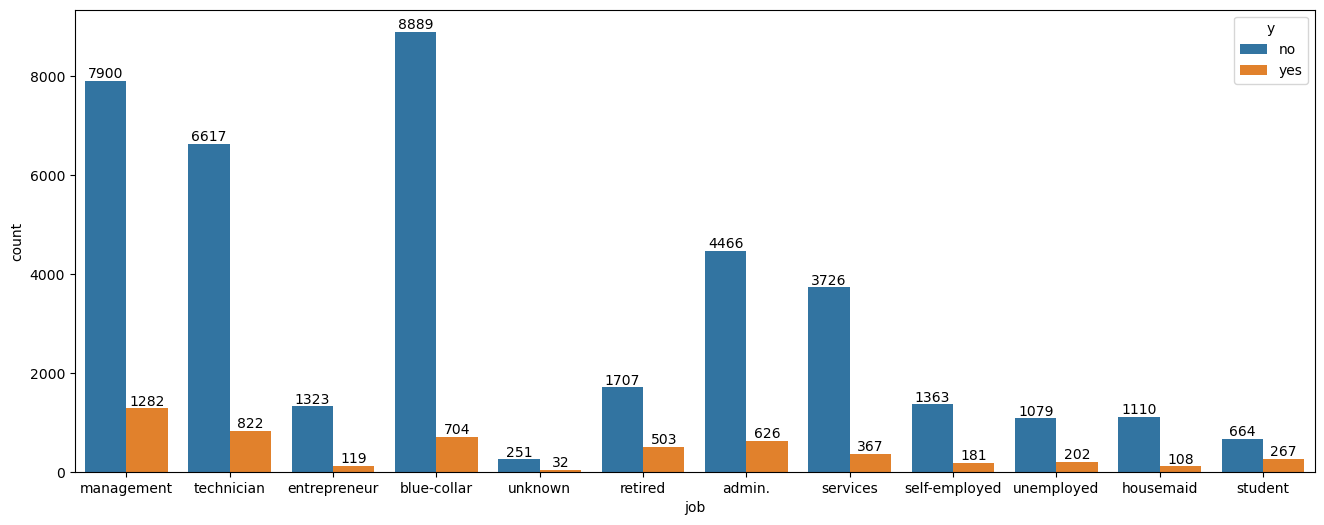

In [158]:
plt.figure(figsize = (16,6))
ax = sns.countplot(x = df["job"],hue = df["y"])
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [159]:
df.groupby('housing').size().reset_index(name='count')

housing  count
0      no  19727
1     yes  24581

In [160]:
df["housing"].value_counts(normalize = True)

housing
yes    0.554776
no     0.445224
Name: proportion, dtype: float64

In [161]:
(df.groupby('housing')['y'].value_counts(normalize=True) * 100).reset_index()

housing    y  proportion
0      no   no   83.195620
1      no  yes   16.804380
2     yes   no   92.278589
3     yes  yes    7.721411

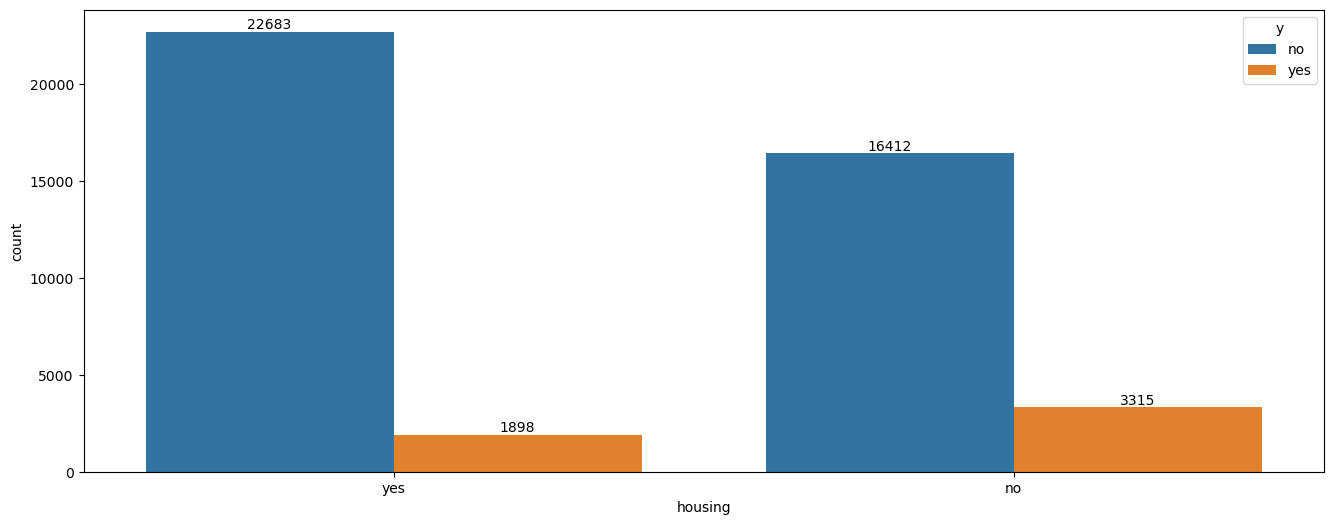

In [162]:
plt.figure(figsize = (16,6))
ax = sns.countplot(x = df["housing"],hue = df["y"])
for i in ax.containers:
    ax.bar_label(i)
plt.show()

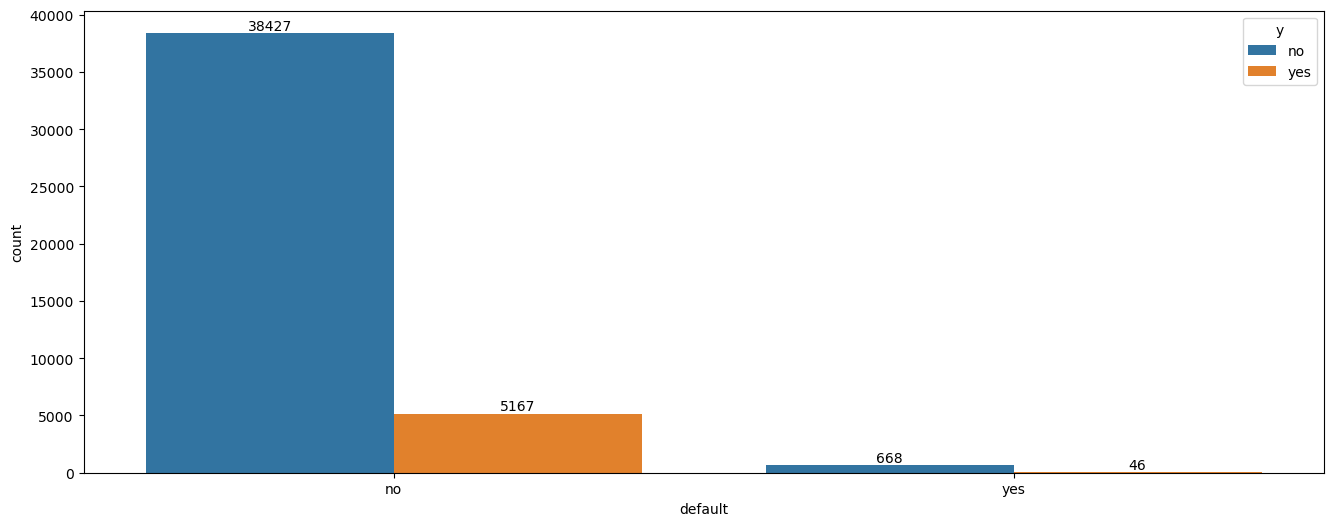

In [163]:
plt.figure(figsize = (16,6))
ax = sns.countplot(x = df["default"],hue = df["y"])
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [164]:
(df.groupby("education")["y"].value_counts(normalize = True) * 100).reset_index()

education    y  proportion
0    primary   no   91.351271
1    primary  yes    8.648729
2  secondary   no   89.383171
3  secondary  yes   10.616829
4   tertiary   no   84.830200
5   tertiary  yes   15.169800
6    unknown   no   86.450905
7    unknown  yes   13.549095

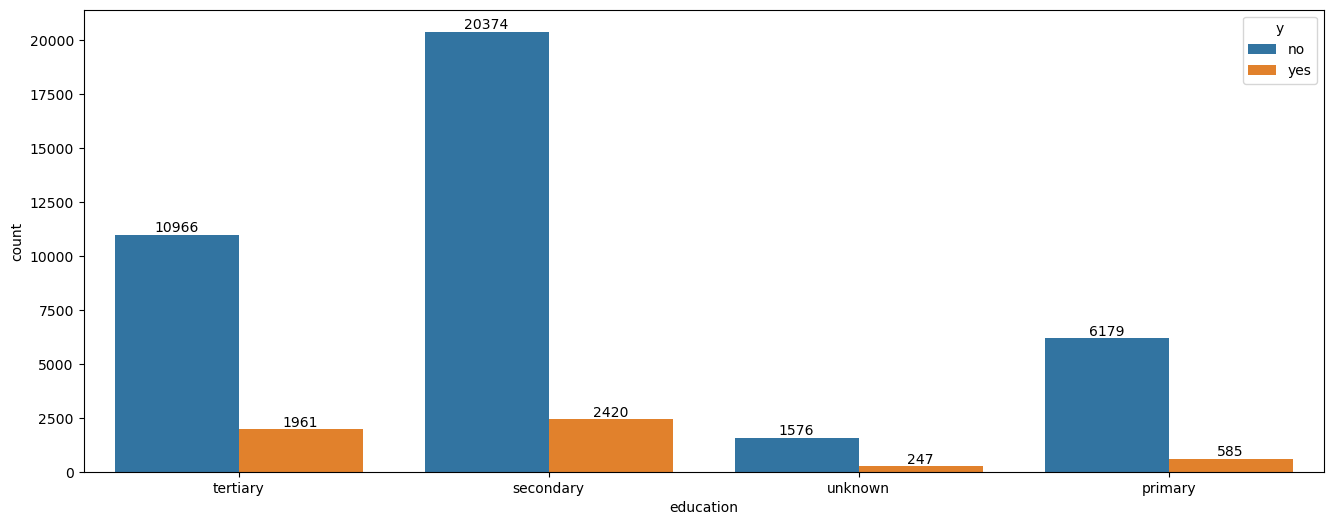

In [165]:
plt.figure(figsize = (16,6))
ax = sns.countplot(x = df["education"],hue = df["y"])
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [166]:
(df.groupby("poutcome")["y"].value_counts(normalize = True) * 100).reset_index()

poutcome    y  proportion
0  failure   no   87.267081
1  failure  yes   12.732919
2    other   no   83.324130
3    other  yes   16.675870
4  success  yes   64.816054
5  success   no   35.183946
6  unknown   no   90.802278
7  unknown  yes    9.197722

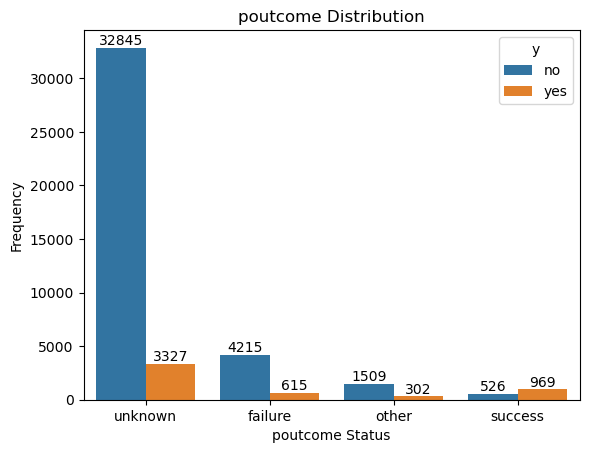

In [167]:
ax = sns.countplot(x = df["poutcome"],hue = df["y"])
for i in ax.containers:
    ax.bar_label(i)
plt.title("poutcome Distribution")
plt.xlabel("poutcome Status")
plt.ylabel("Frequency")
plt.show()

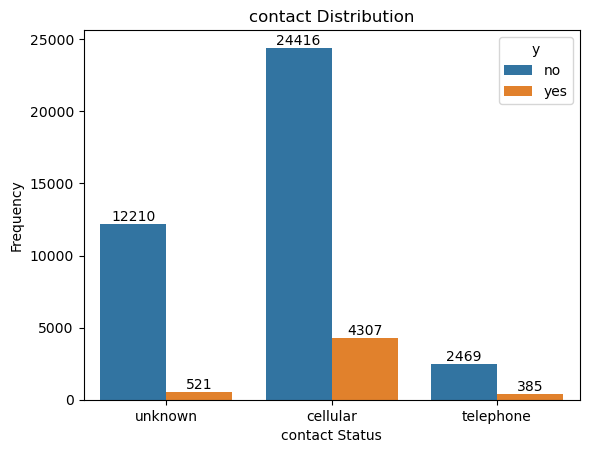

In [168]:
ax = sns.countplot(x = df["contact"],hue = df["y"])
for i in ax.containers:
    ax.bar_label(i)
plt.title("contact Distribution")
plt.xlabel("contact Status")
plt.ylabel("Frequency")
plt.show()

In [169]:
features_to_use = [
    'age', 'job', 'marital', 'education', 'default', 'balance',
    'housing', 'loan', 'contact',
    'campaign','pdays', 'previous', 'poutcome','y'
]

In [170]:
df = df[features_to_use]

In [171]:
df["y"] = df["y"].replace({"yes":1,"no":0})

In [172]:
df.sample(5)

age          job   marital  education default  balance housing loan  \
13095   45   technician  divorced  secondary      no    12389      no  yes   
9849    58    housemaid   married    primary      no      422      no   no   
8560    40  blue-collar   married    primary      no      919     yes   no   
38177   52  blue-collar   married  secondary      no     1039     yes  yes   
36611   41       admin.    single  secondary      no      224     yes   no   

         contact  campaign  pdays  previous poutcome  y  
13095   cellular         1     -1         0  unknown  0  
9849     unknown         1     -1         0  unknown  0  
8560     unknown         2     -1         0  unknown  0  
38177  telephone         4     -1         0  unknown  0  
36611   cellular         8     -1         0  unknown  0

In [173]:
df1 = pd.get_dummies(df, columns=['job', 'marital', 'education','default','housing','loan','contact','poutcome'])

In [174]:
df1.head()

age  balance  campaign  pdays  previous  y  job_admin.  job_blue-collar  \
0   58     2143         1     -1         0  0       False            False   
1   44       29         1     -1         0  0       False            False   
2   33        2         1     -1         0  0       False            False   
3   47     1506         1     -1         0  0       False             True   
4   33        1         1     -1         0  0       False            False   

   job_entrepreneur  job_housemaid  ...  housing_yes  loan_no  loan_yes  \
0             False          False  ...         True     True     False   
1             False          False  ...         True     True     False   
2              True          False  ...         True    False      True   
3             False          False  ...         True     True     False   
4             False          False  ...        False     True     False   

   contact_cellular  contact_telephone  contact_unknown  poutcome_failure  \
0             False              False             True             False   
1             False              False             True             False   
2             False              False             True             False   
3             False              False             True             False   
4             False              False             True             False   

   poutcome_other  poutcome_success  poutcome_unknown  
0           False             False              True  
1           False             False              True  
2           False             False              True  
3           False             False              True  
4           False             False              True  

[5 rows x 38 columns]

In [175]:
print(df1.columns)
print(len(df1.columns))

Index(['age', 'balance', 'campaign', 'pdays', 'previous', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')
38


In [176]:
df = df1

In [177]:
df = df.astype("int")

In [178]:
df[["y","contact_unknown"]].corr()

y  contact_unknown
y                1.000000        -0.151213
contact_unknown -0.151213         1.000000

## **Model Building**

In [179]:
x = df.drop("y",axis = 1)
y = df["y"]

In [180]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42,stratify = y
)

In [181]:
y_train.value_counts(normalize = True)

y
0    0.882356
1    0.117644
Name: proportion, dtype: float64

In [182]:
y_test.value_counts(normalize = True)

y
0    0.882306
1    0.117694
Name: proportion, dtype: float64

In [183]:
lr = LogisticRegression(max_iter = 1000,penalty = "l2")
knn = KNeighborsClassifier(n_neighbors = 4)
dt = DecisionTreeClassifier()

In [184]:
lr.fit(x_train,y_train)
yhat1 = lr.predict(x_test)
print("accuracy : ",accuracy_score(y_test,yhat1))
print(classification_report(y_test,yhat1))

accuracy :  0.8923493568043331
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7819
           1       0.66      0.18      0.28      1043

    accuracy                           0.89      8862
   macro avg       0.78      0.58      0.61      8862
weighted avg       0.87      0.89      0.86      8862



In [185]:
knn.fit(x_train,y_train)
yhat1 = knn.predict(x_test)
print("accuracy : ",accuracy_score(y_test,yhat1))
print(classification_report(y_test,yhat1))

accuracy :  0.8803881742270367
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7819
           1       0.45      0.08      0.14      1043

    accuracy                           0.88      8862
   macro avg       0.67      0.53      0.54      8862
weighted avg       0.84      0.88      0.84      8862



In [186]:
dt.fit(x_train,y_train)
yhat1 = dt.predict(x_test)
print("accuracy : ",accuracy_score(y_test,yhat1))
print(classification_report(y_test,yhat1))

accuracy :  0.8209207853757616
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      7819
           1       0.26      0.28      0.27      1043

    accuracy                           0.82      8862
   macro avg       0.58      0.59      0.58      8862
weighted avg       0.83      0.82      0.82      8862



In [187]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb  = XGBClassifier(n_estimators=50,random_state=2)

In [188]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'ETC': etc,
    'GBDT':gbdt,
    'XGBC':xgb
}

In [189]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    cr = classification_report(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)
    return accuracy,cr,cm

In [198]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision,cm11 = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print(current_precision)
    print(cm11)

For  SVC
Accuracy -  0.7904536222071767
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7819
           1       0.13      0.14      0.14      1043

    accuracy                           0.79      8862
   macro avg       0.51      0.51      0.51      8862
weighted avg       0.80      0.79      0.79      8862

[[6857  962]
 [ 895  148]]
For  KN
Accuracy -  0.8738433762130444
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      7819
           1       0.38      0.12      0.18      1043

    accuracy                           0.87      8862
   macro avg       0.64      0.55      0.56      8862
weighted avg       0.83      0.87      0.84      8862

[[7619  200]
 [ 918  125]]
For  DT
Accuracy -  0.8934777702550214
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7819
           1       0.71      0.16      0.26      1043

    accura

## **Final Model is GBDT**

In [199]:
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
gbdt.fit(x_train,y_train)
y_pred_voting = gbdt.predict(x_test)
print(accuracy_score(y_test,y_pred_voting))
print(classification_report(y_test,y_pred_voting))
print(confusion_matrix(y_test,y_pred_voting))

0.8935906116000902
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7819
           1       0.70      0.17      0.27      1043

    accuracy                           0.89      8862
   macro avg       0.80      0.58      0.61      8862
weighted avg       0.88      0.89      0.86      8862

[[7742   77]
 [ 866  177]]


## **Plotting Confusion Matrix**

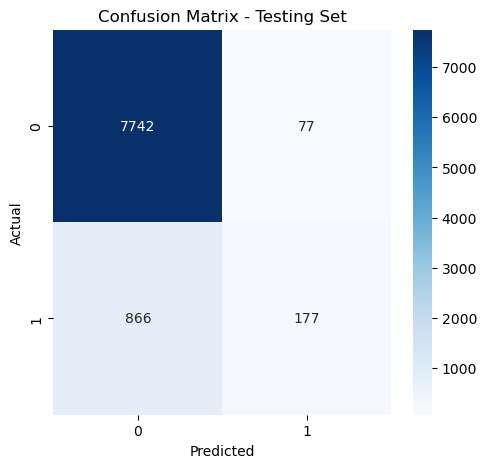

In [200]:
cm_test = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

In [201]:
import pickle

In [209]:
import joblib

In [210]:
pickle.dump(gbdt,open("voting_model_personal_loan.pkl","wb"))

In [205]:
model = gbdt

In [206]:
model

GradientBoostingClassifier(n_estimators=50, random_state=2)


--- SHAP Waterfall explanation for test sample 0 ---


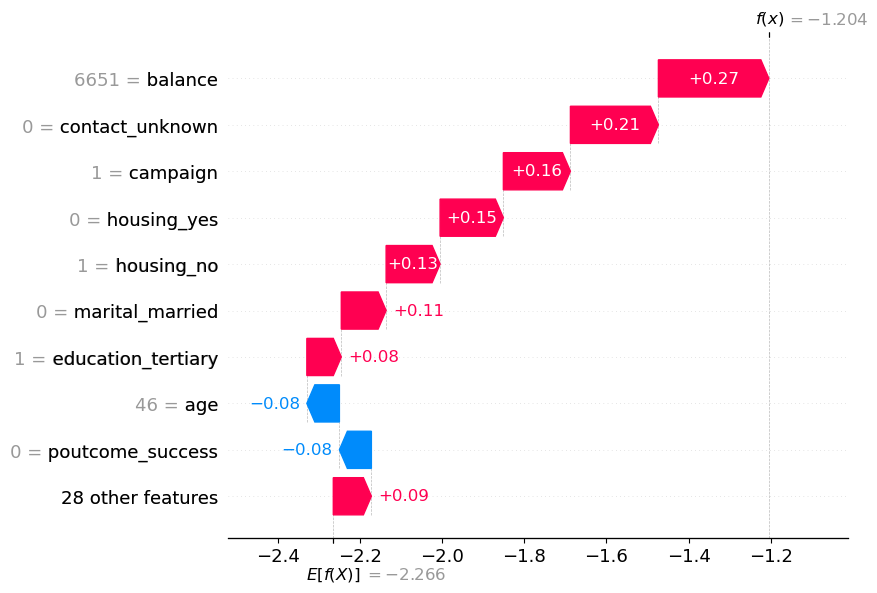


--- SHAP Waterfall explanation for test sample 1 ---


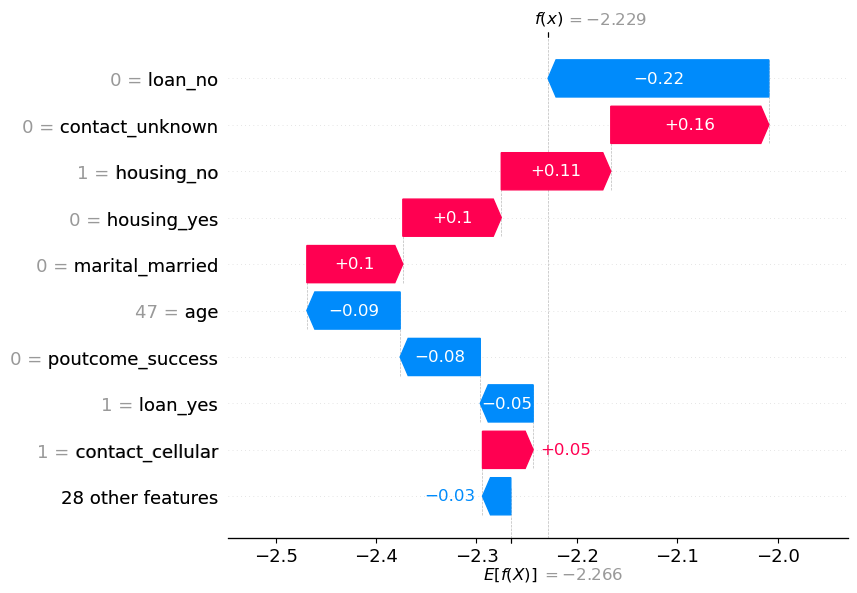


--- SHAP Waterfall explanation for test sample 2 ---


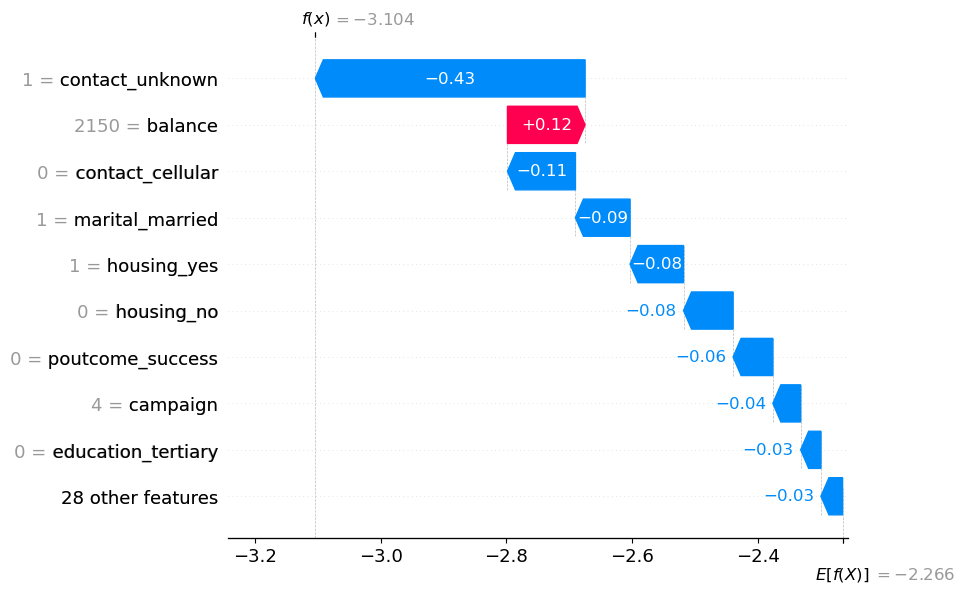


--- SHAP Waterfall explanation for test sample 3 ---


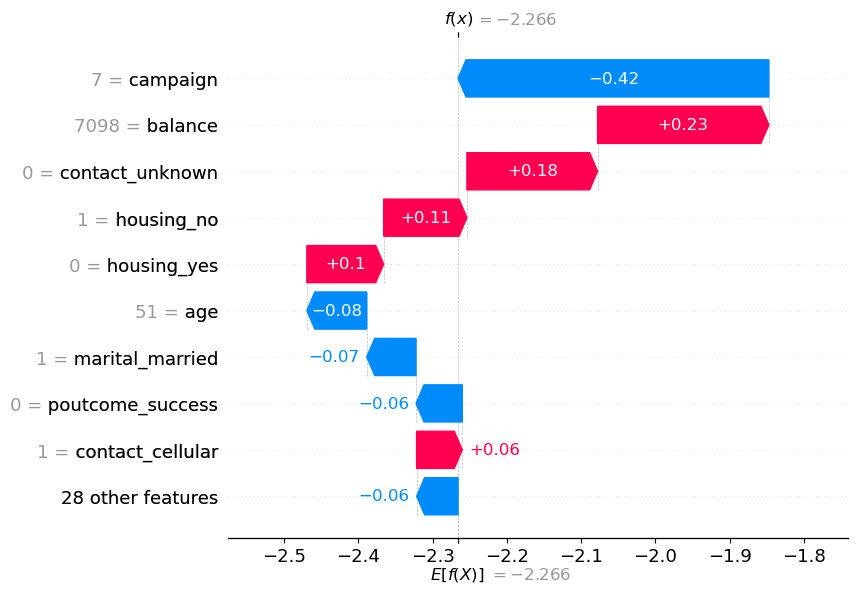


--- SHAP Waterfall explanation for test sample 4 ---


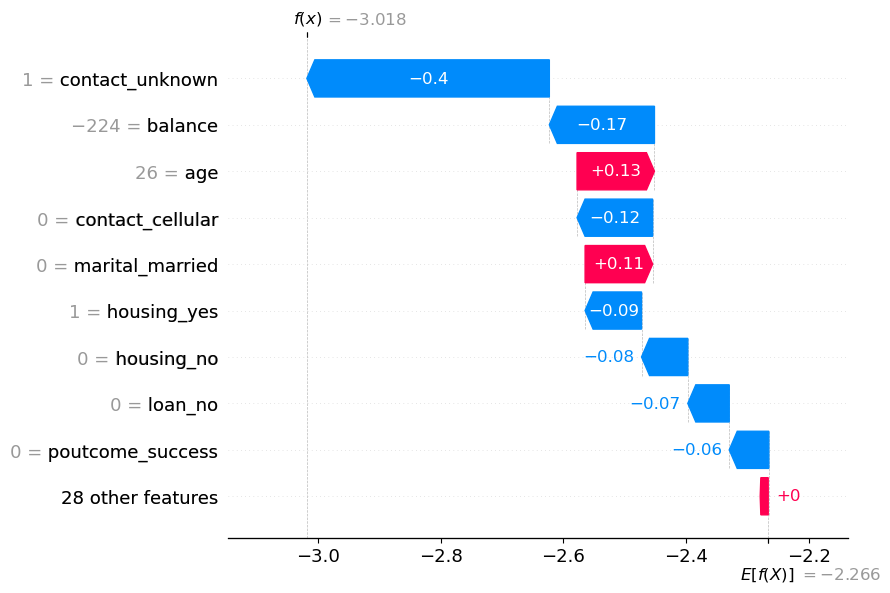


--- LIME explanation for test sample 0 ---



--- LIME explanation for test sample 1 ---



--- LIME explanation for test sample 2 ---



--- LIME explanation for test sample 3 ---



--- LIME explanation for test sample 4 ---


In [208]:
import shap
import lime.lime_tabular
import numpy as np
# ==========================
# SHAP EXPLANATIONS
# ==========================


explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

# Explain 5 test samples
for i in range(5):
    print(f"\n--- SHAP Waterfall explanation for test sample {i} ---")
    shap.plots.waterfall(
        shap.Explanation(
            values=shap_values[i],
            base_values=explainer.expected_value,
            data=x_test.iloc[i].values,
            feature_names=x_test.columns
        )
    )
# ==========================
# LIME EXPLANATIONS
# ==========================
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=x_train.columns,
    class_names=[str(c) for c in np.unique(y_train)],
    mode='classification'
)

# Explain 5 test samples
for i in range(5):
    print(f"\n--- LIME explanation for test sample {i} ---")
    exp = lime_explainer.explain_instance(
        data_row=x_test.iloc[i].values,
        predict_fn=model.predict_proba
    )
    exp.show_in_notebook(show_table=True)
